**Problem Statement:**

The size of the brain is a frequent topic of study within the fields of anatomy, biological anthropology, animal science and evolution. Brain size is sometimes measured by weight and sometimes by volume (via MRI scans or by skull volume). 

Regarding "intelligence testing", a question that has been frequently investigated is the relation of brain size to intelligence. There are many ways to assess a person's intelligence. But Ed Klaber of Chelmsford, England, came up with one of his own. He wants to know if people with bigger heads have bigger brains. It is said that measuring the size of the head does give some indication of how big the brain is. 

Even though head size also depends on factors such as the muscularity of the head and thickness of the bone, it's very likely that a bigger head means a bigger brain. Thus, it seems that head size and the brain weight are very much related to each other in scientific terms. In this demonstration, we will try to prove this using machine learning. 

Generally, the Head size of humans gives impressions of the weight of brain. Thus, here we will try to predict the "Brain Weight" of the person using the "Head Size".

Below, you can find the dataset for this use case. The Head Brain file consist of four attributes (Gender, Age, Headsize, Brainweight) .

You have to train the machine for learning the size of head and the corresponding brain weight. Then, after learning/training, it should be able to predict the brain weight given on certain head size. 

Make sure to follow the steps mentioned below: 

    Complete the Exploratory Data Analysis(EDA).
    Understand the type of the problem and apply the appropriate model for its training and testing phase.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading nad printing the head of the dataset
data = pd.read_csv("/home/santosh/code_git/dataset1/headbrain.csv")
data.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.shape

(237, 4)

A small introduction about the dataset this dataset contains 237 observations and 4 features and it contains all numerical data, the targeet variable of theis dataset is BrainWeight

## **Exploratory Data Analysis**

As we can see we have to predict the weight of the brain with the remaining features so i am going to apply regresson in this problem

In [4]:
#lets check the null values
data.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

There are no null values lets go further, lets see some visualizations

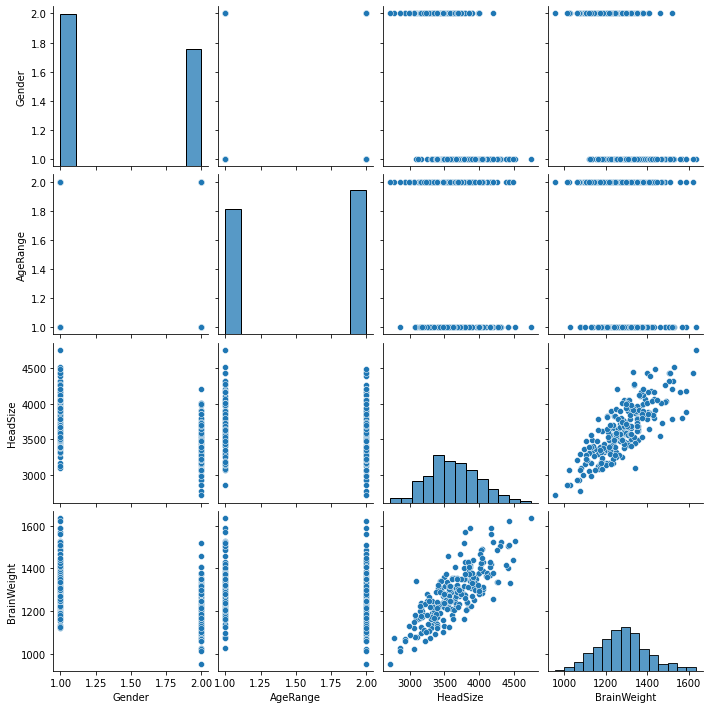

In [5]:
sns.pairplot(data)

## **Outlier detection and treatment**

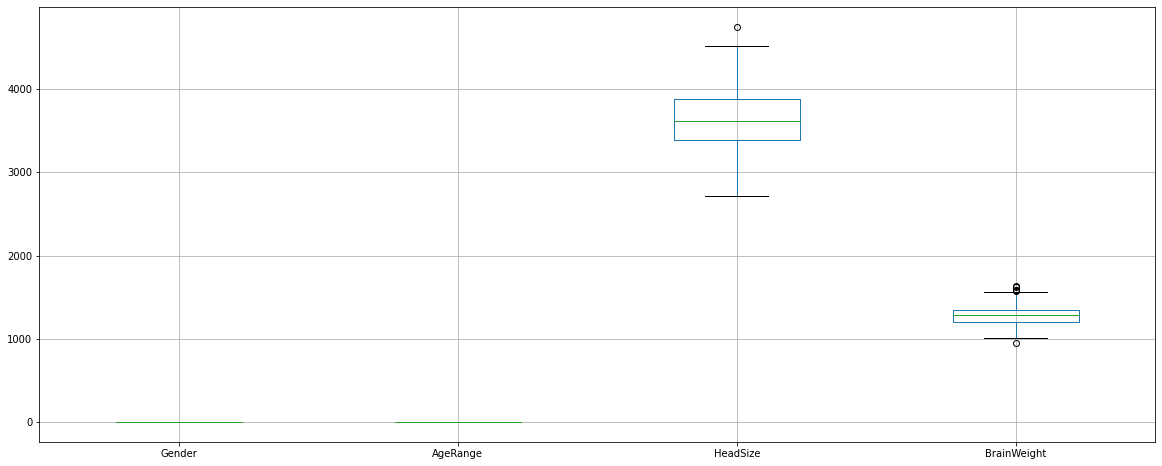

In [6]:
data.boxplot(figsize=[20,8])
plt.show()

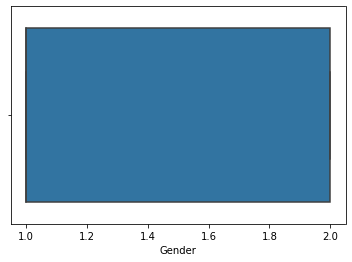

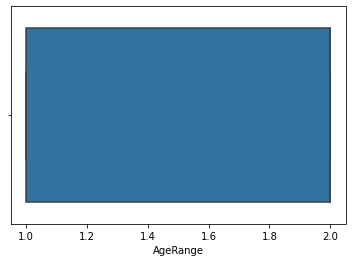

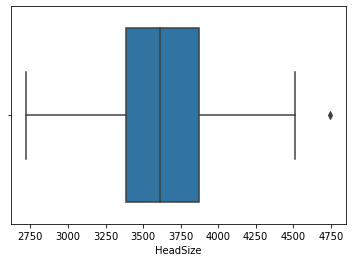

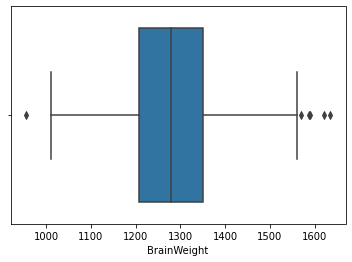

In [7]:
for i in data:
    sns.boxplot(data[i])
    plt.show()

In [8]:
data

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


<AxesSubplot:xlabel='BrainWeight'>

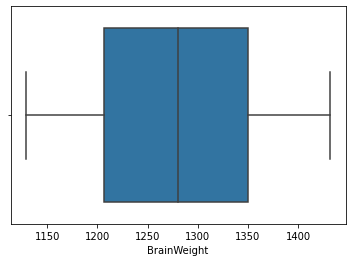

In [9]:
lower = data["BrainWeight"].quantile(0.10)
upper = data["BrainWeight"].quantile(0.90)

data["BrainWeight"] = np.where(data["BrainWeight"] <lower, lower,data['BrainWeight'])
data["BrainWeight"] = np.where(data["BrainWeight"] >upper, upper,data['BrainWeight'])
sns.boxplot(data["BrainWeight"])

# Checking correlation

<AxesSubplot:>

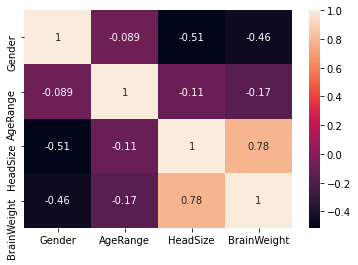

In [10]:
sns.heatmap(data.corr(), annot = True)

# Checking Skewness

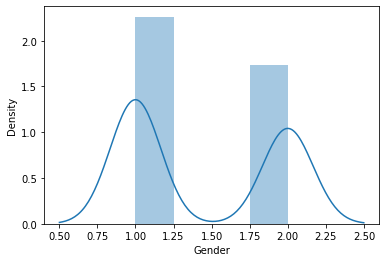

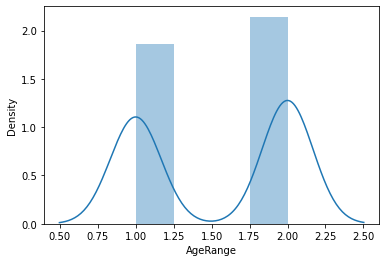

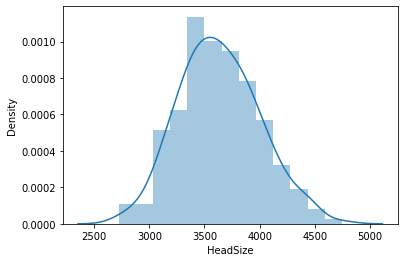

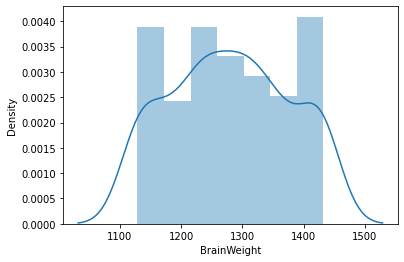

In [11]:
for i in data:
    sns.distplot(data[i])
    plt.show()

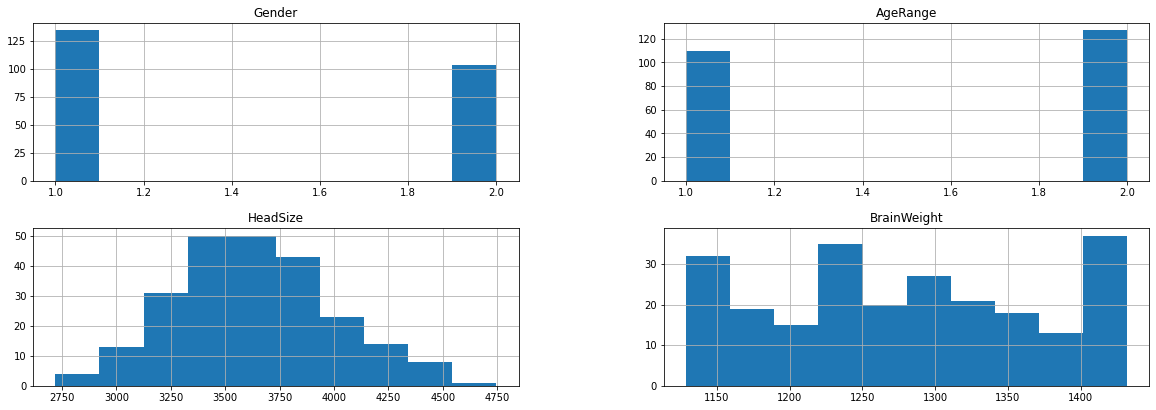

In [16]:
data.hist(figsize=[20,8])
plt.subplots_adjust(bottom = 0.25)
plt.show()

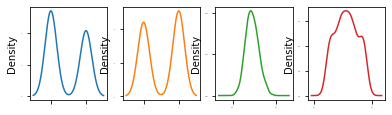

In [17]:
data.plot(kind = 'density', subplots = True, layout = (6,11), sharex = False, legend = False, fontsize = 1, figsize = (18,12))
plt.show()

# Diving dependent and independent variables

In [12]:
x = data.drop(["BrainWeight"], axis = 1)
y = data["BrainWeight"]
print(x.shape,y.shape)

(237, 3) (237,)


# Feature scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_new = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x = x_new
x.head()

,Gender,AgeRange,HeadSize
0,0.0,0.0,0.884065
1,0.0,0.0,0.502220
2,0.0,0.0,0.760237
3,0.0,0.0,0.521460
4,0.0,0.0,0.718796


# Model Building

In [23]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

In [15]:
#dividing test and validation test
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 100, test_size = 0.33)
print(x_train.shape, y_train.shape)

(158, 3) (158,)


In [20]:
#now checking the cross_val_score of models to get the best model 
models = []
models.append(('LR', LinearRegression()))
models.append(('L', Lasso()))
models.append(('R', Ridge()))
models.append(('DEC', DecisionTreeRegressor()))
models.append(('RAN', RandomForestRegressor()))


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=100, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.527342, 0.213798
L: 0.526925, 0.200878
R: 0.509720, 0.196789
DEC: -0.040983, 0.689289
RAN: 0.386273, 0.348136


In [26]:
l = Lasso()
r = Ridge()
lr = LinearRegression()

In [28]:
model = []
model.append(('Linear', LinearRegression()))
model.append(('lasso', Lasso()))
model.append(('ridge', Ridge()))

for n,m in model:
    m.fit(x_train,y_train)
    prediction = m.predict(x_test)
    print("score of ",n,"is:", m.score(x_train,y_train)*100)
    print("MSE :",mean_squared_error(y_test, prediction))
    print("MAE :",mean_absolute_error(y_test, prediction))
    print("RMSE:", sqrt(mean_squared_error(y_test, prediction)))
    print('\n')

score of  Linear is: 60.84340824481587
MSE : 3394.6034591702723
MAE : 47.60321194075336
RMSE: 58.26322561590864


score of  lasso is: 60.45270005287395
MSE : 3441.7366665516543
MAE : 47.97891983937133
RMSE: 58.66631628585226


score of  ridge is: 59.166841446922426
MSE : 3535.2041588223037
MAE : 48.800621453563394
RMSE: 59.457582853848876




# Saving the model

In [29]:
#saving the model
import joblib
joblib.dump(l, "Lasso_model.obj")
model1 = joblib.load('Lasso_model.obj')